# Linear Algebra in Data Science

Most of our operations on data require translating our raw datasets into something we can write code to operate on.  Often we will attempt to translate raw datasets into tables and perform filter or aggregations.  If our table is made up mostly numerical values, we can also view it as a matrix and use many ideas from linear algebra to help analyze the data stored in the matrix.

In [1]:
import numpy as np

A _vector_ is an array of numbers.

In [2]:
v = np.random.random(10)
v

array([ 0.66993459,  0.63246441,  0.38614197,  0.75450976,  0.28195878,
        0.66846293,  0.19292232,  0.2021837 ,  0.82736718,  0.63091287])

Two vectors of the same dimension can be added and subtracted, or multiplied by a single value.

In [3]:
v + v

array([ 1.33986917,  1.26492882,  0.77228393,  1.50901952,  0.56391756,
        1.33692585,  0.38584463,  0.4043674 ,  1.65473437,  1.26182574])

In [4]:
2 * v

array([ 1.33986917,  1.26492882,  0.77228393,  1.50901952,  0.56391756,
        1.33692585,  0.38584463,  0.4043674 ,  1.65473437,  1.26182574])

A matrix $M$ can be seen as
- a $m \times n$ grid of elements, or
- a collection of vectors, where each column represents a $m \times 1$ vector (or each row is a $1\times n$ vector).

In [5]:
M = np.random.random((2, 3))  # 2x3 matrix
M

array([[ 0.43534357,  0.80832371,  0.74769297],
       [ 0.25168462,  0.29323653,  0.93740695]])

In [6]:
M[0]  # first row

array([ 0.43534357,  0.80832371,  0.74769297])

In [7]:
M[:,0]  # first column

array([ 0.43534357,  0.25168462])

- _Matrices_ are often notated by a capital letter (e.g., _M_), and
- _vectors_ by a lower case letter (e.g., _v_). 
- A _scalar_, in constrast to a vector, is a single value or variable, and is often notated with a Greek character (e.g., $\alpha$ or $\lambda$)

In [8]:
M = np.random.random((2, 5))
v = np.random.random(5)
alpha = 10

### Matrix multiplication

Operations work like you know from linear algebra: we can multiply any $n \times m$ matrix with an $m$-dimendional vector, giving us a vector in $n$ dimensions.

In [9]:
M.dot(v)  # 2x5 matrix times 5-dim vector gives a 2-dim vector

array([ 0.59698243,  0.65230239])

In [10]:
M * v  # Don't confuse the above with the element-wise multiplication

array([[ 0.02554489,  0.03384006,  0.26629625,  0.25660951,  0.0146917 ],
       [ 0.14710188,  0.09327531,  0.20719716,  0.05819591,  0.14653212]])

The dot product is the most fundamental operations on vectors.  `x.dot(y)` compute the sum of the element-wise product of the two arrays.  If `x` and  `y` are equal-length arrays then the dot product is a scalar value.

The `.dot` operator also defines matrix multiplication. If $x$ and $y$ are matrices then `x.dot(y)` is the product of the two matrices.  If two matrices are to be multiplied, the number of columns in the first matrix *must* match the number of rows in the second.  For the above to work, if `x` is an m x n matrix, then `y` must have n rows.  Then, the multiplication operation is just the dot product of all rows in $x$ with all columns in $y$.  Any cell $(i, j)$ in the product is `x_i.dot(y_j)` where $x_i$ is row $i$ and $y_j$ is column $j$.


The transposed matrix $M^T$ of $M$, which swaps rows with columns.

In [11]:
M.T  # transpose 2x5 matrix to 5x2 one

array([[ 0.13298838,  0.7658221 ],
       [ 0.20470843,  0.5642496 ],
       [ 0.43728473,  0.34023819],
       [ 0.59251793,  0.13437586],
       [ 0.02563998,  0.25572802]])

In [12]:
v.dot(M.T)  # 5-dim vector times 5x2 matrix gives 2-dim vector

array([ 0.59698243,  0.65230239])

Scalar multiplication is straight-forward.

In [13]:
alpha * M

array([[ 1.32988379,  2.04708427,  4.37284733,  5.92517934,  0.25639977],
       [ 7.65822096,  5.64249604,  3.4023819 ,  1.34375855,  2.55728017]])

In [14]:
alpha * v

array([ 1.92083616,  1.65308599,  6.08976794,  4.33083118,  5.72999879])

Also matrices can be multiplied with each other...

In [15]:
N = np.random.random((5, 3))
M.dot(N)

array([[ 0.77716772,  0.79474174,  0.57896433],
       [ 1.38034767,  1.32252039,  1.22523139]])

... or with themselves (if $n = m$)

In [16]:
A = np.random.random((5,5))
A

array([[ 0.17249202,  0.40365045,  0.53284669,  0.17779053,  0.32519868],
       [ 0.28439827,  0.90610937,  0.18140915,  0.69444175,  0.61413287],
       [ 0.0661374 ,  0.9773175 ,  0.01620026,  0.09241967,  0.51670086],
       [ 0.90356179,  0.21492623,  0.46544369,  0.86079233,  0.28981792],
       [ 0.19532   ,  0.43288774,  0.13355917,  0.63150408,  0.51643255]])

In [17]:
A.dot(A)

array([[ 0.40395461,  1.1351247 ,  0.29995469,  0.7186297 ,  0.79878159],
       [ 1.06617376,  1.52823036,  0.72410269,  1.68216682,  1.26111163],
       [ 0.47485591,  1.17162262,  0.32482417,  1.09779875,  0.92370731],
       [ 1.08215138,  1.32482153,  0.967348  ,  1.27689926,  1.06546996],
       [ 0.83710948,  0.96089846,  0.547673  ,  1.21740799,  0.84810231]])

In [18]:
np.linalg.matrix_power(A, 2)  # A squared, which is the same as A times A

array([[ 0.40395461,  1.1351247 ,  0.29995469,  0.7186297 ,  0.79878159],
       [ 1.06617376,  1.52823036,  0.72410269,  1.68216682,  1.26111163],
       [ 0.47485591,  1.17162262,  0.32482417,  1.09779875,  0.92370731],
       [ 1.08215138,  1.32482153,  0.967348  ,  1.27689926,  1.06546996],
       [ 0.83710948,  0.96089846,  0.547673  ,  1.21740799,  0.84810231]])

In [19]:
np.linalg.matrix_power(A, 4)

array([[ 2.96218851,  4.26430867,  2.17318357,  4.41911357,  3.47438766],
       [ 5.279937  ,  7.83447434,  3.97952308,  7.81508648,  6.30961789],
       [ 3.55644678,  5.05207763,  2.66416406,  5.19500888,  4.10996541],
       [ 4.58269421,  7.10184812,  3.4168563 ,  6.99577371,  5.69282218],
       [ 3.65007893,  5.48815243,  2.76692142,  5.40619184,  4.40274657]])

A special matrix is the _identity matrix **1**_, which doesn't do much: _**1**A = A**1** = A_

In [20]:
I = np.identity(5)
I

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [21]:
A.dot(I)

array([[ 0.17249202,  0.40365045,  0.53284669,  0.17779053,  0.32519868],
       [ 0.28439827,  0.90610937,  0.18140915,  0.69444175,  0.61413287],
       [ 0.0661374 ,  0.9773175 ,  0.01620026,  0.09241967,  0.51670086],
       [ 0.90356179,  0.21492623,  0.46544369,  0.86079233,  0.28981792],
       [ 0.19532   ,  0.43288774,  0.13355917,  0.63150408,  0.51643255]])

In [22]:
I.dot(A)

array([[ 0.17249202,  0.40365045,  0.53284669,  0.17779053,  0.32519868],
       [ 0.28439827,  0.90610937,  0.18140915,  0.69444175,  0.61413287],
       [ 0.0661374 ,  0.9773175 ,  0.01620026,  0.09241967,  0.51670086],
       [ 0.90356179,  0.21492623,  0.46544369,  0.86079233,  0.28981792],
       [ 0.19532   ,  0.43288774,  0.13355917,  0.63150408,  0.51643255]])

In [23]:
np.linalg.matrix_power(I, 1000)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

Note that a matrix $A$ could have an inverse $A^{-1}$, such that $AA^{-1} = \textbf{1} $

In [24]:
A_inv = np.linalg.inv(A)
A.dot(A_inv).round(4)  # you might see weird "negative zeroes" in the matrix due to rouding errors

array([[ 1.,  0.,  0., -0.,  0.],
       [-0.,  1.,  0.,  0.,  0.],
       [-0.,  0.,  1., -0.,  0.],
       [ 0.,  0., -0.,  1., -0.],
       [ 0., -0.,  0.,  0.,  1.]])

Note that the inverse $A^{-1}$ is literally $A$ to the power -1:

In [25]:
np.isclose(A_inv, np.linalg.matrix_power(A, -1))

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

### Matrix Rank

The _rank_ of a matrix is its number of linearly-independent vectors. Its a fundamental result in linear algebra that the _column rank_ equals the _row rank_ of a matrix, so we safely speak of its _rank_ in general. Hence, it follows that rank $A$ = rank $A^T$.

In [26]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [6, 9, 12]])

In [27]:
print np.linalg.matrix_rank(A), np.linalg.matrix_rank(A.T)

2 2


Indeed, the third row is twice the first plus the second.

In [28]:
print 2 * A[0] + A[1] 
print A[2]

[ 6  9 12]
[ 6  9 12]


But also, the third column is negative the first plus twice the second.

In [29]:
print -A[:, 0] + 2 * A[:, 1]
print A[:, 2]

[ 3  6 12]
[ 3  6 12]


We say a matrix has _full rank_ if its rank equals the number of rows or columns, whichever is smaller.

Since matrices can be multiplied with vectors, we often regard them as linear transformations, or mappings, from one vector space to another:

$$M: v \mapsto Mv$$

The rank is also the dimension of the image of the linear transformation that is given by multiplication by _M_. More generally, if a linear operator on a vector space (possibly infinite-dimensional) has finite-dimensional image (e.g., a finite-rank operator), then the rank of the operator is defined as the dimension of the image.

As a special case, when $n = m$, then rank $A = n$ if and only if its inverse $A^{-1}$ exists.

In [30]:
M = np.random.random((20, 20))
print np.linalg.matrix_rank(M)
M_inv = np.linalg.inv(M)
np.isclose(np.identity(20), M_inv.dot(M)).sum()

20


400

### Norm

The _norm_ of a vector is its distance to the Origin, or the length of its arrow.

In [31]:
v = np.random.random(5)
np.linalg.norm(v)

1.1601186067634819

This is computed by using Pythagoras (for any dimension): $a^2 + b^2 = c^2$.

In [32]:
print sum([elt ** 2 for elt in v]) ** (1/2.)  # in python style
print np.sqrt(np.square(v).sum())  # numpy style

1.16011860676
1.16011860676


- The above norm using Pythogoras is called the Euclidean norm, or the L2-norm. 
- Another commonly used norm is the Manhattan distance, or the L1-norm: $||v|| = \sum_i |v_i|$
- It's called Manhattan distance, because you can only walk on a grid.

In [33]:
np.linalg.norm(v, ord=1)

1.9906856683365495

In [34]:
print sum([abs(elt) for elt in v])  # in python style
print np.abs(v).sum()  # numpy style

1.99068566834
1.99068566834


In [35]:
np.linalg.norm(v, ord=1.1)

1.7856167815727257

### Dot Product

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3e/Dot_Product.svg"  style="height: 170px;"/ align=right>
- The _dot product_ or _inner product_ of two vectors $v$ and $w$ of the same dimension is defined as $<v, w> = \sum_i v_i w_i$.
- Note that the _dot product_ is a single value, or a scalar, and not a vector.
- Geometrically, it's the length of the projection of the one vector onto the other (see picture).
- That implies that $<v, w> = ||v||  ||w|| $ cos $\theta$.
- In an Euclidean space, we have $ ||v||^2 = <v, v>$

In [36]:
w = np.random.random(v.shape[0])
v.dot(w)

1.1105542853696984

In [37]:
print np.linalg.norm(v) ** 2
print v.dot(v)

1.34587518176
1.34587518176


The angle $\theta$ can be computed as follows.

In [38]:
theta = np.arccos(v.dot(w) / (np.linalg.norm(v) * np.linalg.norm(w)))
theta

0.9258868904299643

In particular, two vectors are _orthogonal_ ($90^o$ angle) if their dot product is zero.

### (*) Eigenvectors

Let's look at an arbitrary matrix _M_

In [39]:
M = np.random.random((2,2))
M

array([[ 0.72152139,  0.96889166],
       [ 0.18037866,  0.89068293]])

We know we can multiply this matrix with any 2-dimensional vector, which whill give us another 2-dimensional vector.

In [40]:
a = np.random.random(2)
b = M.dot(a)

Let's draw both vectors

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline

def draw(a, lim=1.5):
    plt.figure(figsize=(3,3))
    colors = list('kyrgb')
    if type(a) != list:
        a = [a]
    for a in a:
        c = colors.pop()
        plt.arrow(0, 0, a[0], a[1], head_width=0.2, fc=c, ec=c)
    plt.xlim(-lim, lim), plt.ylim(-lim, lim)

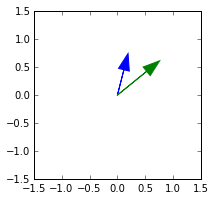

In [42]:
draw([a, b])

For this matrix _M_, we now try to find a vector _v_, along with a scalar $\lambda$, such that:
- $M \times v = \lambda v$

In fact, if we accept complex numbers, we know that each $n \times n$-matrix has
- $n$ such vectors, called _eigenvectors_, along with their
- respective scalars, called _eigenvalues_.

In [43]:
eigenvalues, eigenvectors = np.linalg.eig(M)
print eigenvalues
print eigenvectors

[ 0.37957984  1.23262448]
[[-0.94299651 -0.88448135]
 [ 0.33280262 -0.46657554]]


Let's try it out.

In [44]:
for i in xrange(len(eigenvalues)):
    v = eigenvectors[:,i]  # columns are eigenvectors
    print M.dot(v), "and", eigenvalues[i] * v, ":", np.isclose(M.dot(v), eigenvalues[i] * v).all()

[-0.35794246  0.12632517] and [-0.35794246  0.12632517] : True
[-1.09023337 -0.57511243] and [-1.09023337 -0.57511243] : True


Let's draw them.

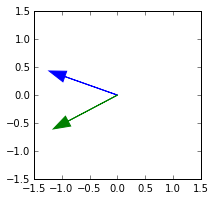

In [45]:
draw([eigenvectors[:,0], eigenvectors[:,1]])

Let's draw the images $Mv = \lambda v$ as well.

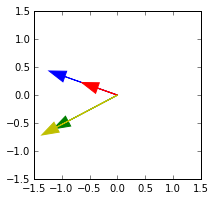

In [46]:
draw([eigenvectors[:,0], eigenvectors[:,1],
      M.dot(eigenvectors[:,0]), M.dot(eigenvectors[:,1])])

In [47]:
print eigenvalues

[ 0.37957984  1.23262448]


<hr>

# Exercises

Given the following matrix $M$, vector $v$ and scalar $\alpha$.

In [48]:
M = np.array([[1,2,3], [4,5,6], [7,8,9]])
v = np.array([2,4,6])
alpha = 123

- Compute the mean of each row of $M$, and the mean of each column of $M$, and the mean of all of $M$
- What is the standard deviation of $v$
- What is $\alpha M v$?
- Can we compute $v M$? And what about $v  M^T$?
- (*) What are the eigenvalues of $M$, and what are the corresponding eigenvectors?